# Exersices

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data
from sklearn import datasets
# Label encoding
from sklearn import preprocessing
# Evaluation
from sklearn import metrics
# Split data
from sklearn.model_selection import train_test_split

# K nearest neighbor (KNN)
from sklearn.neighbors import KNeighborsClassifier
# Logistic regression
from sklearn.linear_model import LogisticRegression
# Decision tree
from sklearn.tree import DecisionTreeClassifier
# Support vector machine (SVM)
from sklearn import svm
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

1. Load the data using the **iris** existing dataset from scikit-learn.

In [5]:
data = datasets.load_iris()
print(data.keys())
for entry in data.DESCR.split("\n")[1:]:
    print(entry)

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.95

In [6]:
iris = pd.DataFrame(
    data.data, columns=data.feature_names)
iris["label"] = data.target
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


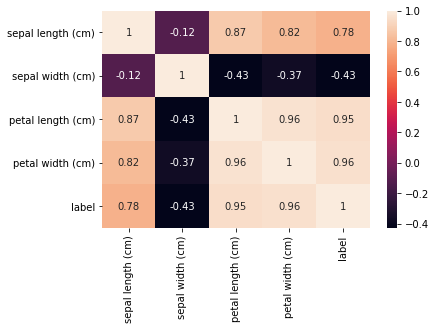

In [7]:
corr = iris.corr()
sns.heatmap(corr, annot=True)

In [8]:
iris.describe().drop(columns="label")

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


2. Explore your data by view and calculating some basic statistical details like percentile, mean, std etc. of the species of 'Iris-setosa', 'Iris-versicolor' and 'Iris-versicolor'. (TIP: Use Pandas!)

In [9]:
iris.groupby("label").describe()

sepal length (cm)                                              \
                  count   mean       std  min    25%  50%  75%  max   
label                                                                 
0                  50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
1                  50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
2                  50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

      sepal width (cm)         ... petal length (cm)      petal width (cm)  \
                 count   mean  ...               75%  max            count   
label                          ...                                           
0                 50.0  3.428  ...             1.575  1.9             50.0   
1                 50.0  2.770  ...             4.600  5.1             50.0   
2                 50.0  2.974  ...             5.875  6.9             50.0   

                                                 
        mean       std  min  25%  50%  75%  max  
label                                            
0      0.246  0.105386  0.1  0.2  0.2  0.3  0.6  
1      1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
2      2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

3. Create some scatter plots or any other kind of plots that help you understand the data.

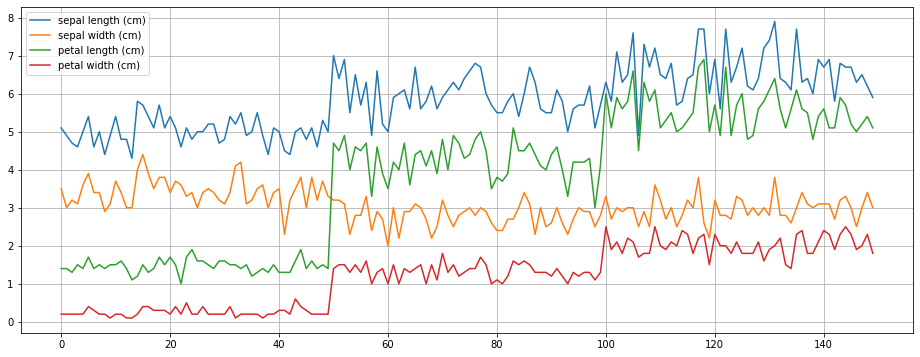

In [10]:
iris.drop(columns="label").plot(figsize=(16,6), grid=True); plt.show()

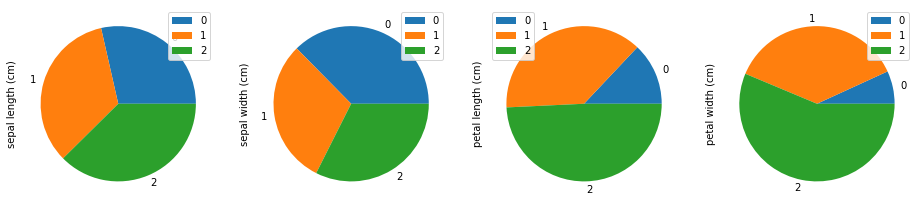

In [32]:
iris.groupby("label").mean().plot(
    kind="pie", subplots=True, figsize=(16,8))
plt.show()

4. Create a model and predict the accuracy. 

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.5)

In [17]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("KNN Accuracy:", metrics.accuracy_score(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

KNN Accuracy: 0.9733333333333334


array([[23,  0,  0],
       [ 0, 23,  0],
       [ 0,  2, 27]])

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print("Log Accuracy:", metrics.accuracy_score(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

Log Accuracy: 0.9333333333333333


array([[23,  0,  0],
       [ 0, 22,  1],
       [ 0,  4, 25]])

In [19]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print("Tree Accuracy:", metrics.accuracy_score(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

Tree Accuracy: 0.96
[[23  0  0]
 [ 0 21  2]
 [ 0  1 28]]


In [20]:
model = svm.SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("SVC Accuracy:", metrics.accuracy_score(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

SVC Accuracy: 1.0
[[23  0  0]
 [ 0 23  0]
 [ 0  0 29]]


In [21]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("NB Accuracy:", metrics.accuracy_score(y_test, y_pred))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

NB Accuracy: 0.9466666666666667
[[23  0  0]
 [ 0 22  1]
 [ 0  3 26]]


5. Play with more datasets, such as **digits**, **wine**, **breast_cancer**, **linnerud** from scikit-learn, or find online datasets, such as [this](https://www.kaggle.com/iamhungundji/covid19-symptoms-checker),  [this](https://www.kaggle.com/crawford/emnist) or [this](https://www.kaggle.com/fabdelja/autism-screening-for-toddlers). (Careful: not all the datasets are appropriate for regression, so make sure to specify that to your query)

In [ ]:
data_digits = datasets.load_digits()
data_wine = datasets.load_wine()
data_cancer = datasets.load_breast_cancer()

In [76]:
models = {
    "KNN":    KNeighborsClassifier(n_neighbors=3),
    "SVM":    svm.SVC(kernel="linear"),
    "logreg": LogisticRegression(),
    "tree":   DecisionTreeClassifier(),
    "naive":  GaussianNB() }

def run_data_through_different_models(data):
    X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3)
    for k,v in models.items():
        model = v
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        results[k].append(metrics.accuracy_score(y_test, y_pred))

In [97]:
results = { "KNN":[], "SVM":[], "logreg":[], "tree":[], "naive":[] }
for i in range(10): run_data_through_different_models(data_cancer)

/home/becode/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/becode/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

In [33]:
data_result = pd.DataFrame(results)
data_result.describe()

NameError: name 'results' is not defined